<a href="https://colab.research.google.com/github/IDE21/AdvanceML/blob/main/AML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import joblib


# Load the dataset
file_path = "/content/dataset.csv"
dataset = pd.read_csv(file_path)

# Drop the 'name' column as it's not relevant for analysis
dataset_cleaned = dataset.drop(columns=["name"])

# Handle missing values by imputing the mean for numerical columns
imputer = SimpleImputer(strategy="mean")
dataset_imputed = pd.DataFrame(imputer.fit_transform(dataset_cleaned), columns=dataset_cleaned.columns)

# Split data into features (X) and target (y)
X = dataset_imputed.drop(columns=["status"])
y = dataset_imputed["status"]

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Convert the target variable 'status' to integer type (categorical)
y = y.astype(int)

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions for Decision Tree
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)

# Evaluate Decision Tree
dt_train_accuracy = accuracy_score(y_train, dt_pred_train)
dt_test_accuracy = accuracy_score(y_test, dt_pred_test)
dt_conf_matrix = confusion_matrix(y_test, dt_pred_test)
dt_classification_rep = classification_report(y_test, dt_pred_test)

print("Decision Tree Performance:")
print(f"Train Accuracy: {dt_train_accuracy}")
print(f"Test Accuracy: {dt_test_accuracy}")
print("Confusion Matrix:\n", dt_conf_matrix)
print("Classification Report:\n", dt_classification_rep)

Decision Tree Performance:
Train Accuracy: 1.0
Test Accuracy: 0.9748953974895398
Confusion Matrix:
 [[209   4]
 [  2  24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       213
           1       0.86      0.92      0.89        26

    accuracy                           0.97       239
   macro avg       0.92      0.95      0.94       239
weighted avg       0.98      0.97      0.98       239



In [21]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions for Random Forest
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)

# Evaluate Random Forest
rf_train_accuracy = accuracy_score(y_train, rf_pred_train)
rf_test_accuracy = accuracy_score(y_test, rf_pred_test)
rf_conf_matrix = confusion_matrix(y_test, rf_pred_test)
rf_classification_rep = classification_report(y_test, rf_pred_test)

print("\nRandom Forest Performance:")
print(f"Train Accuracy: {rf_train_accuracy}")
print(f"Test Accuracy: {rf_test_accuracy}")
print("Confusion Matrix:\n", rf_conf_matrix)
print("Classification Report:\n", rf_classification_rep)


Random Forest Performance:
Train Accuracy: 1.0
Test Accuracy: 0.9916317991631799
Confusion Matrix:
 [[211   2]
 [  0  26]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       213
           1       0.93      1.00      0.96        26

    accuracy                           0.99       239
   macro avg       0.96      1.00      0.98       239
weighted avg       0.99      0.99      0.99       239



In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions for Gradient Boosting
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)

# Evaluate Gradient Boosting
gb_train_accuracy = accuracy_score(y_train, gb_pred_train)
gb_test_accuracy = accuracy_score(y_test, gb_pred_test)
gb_conf_matrix = confusion_matrix(y_test, gb_pred_test)
gb_classification_rep = classification_report(y_test, gb_pred_test)

print("\nGradient Boosting Performance:")
print(f"Train Accuracy: {gb_train_accuracy}")
print(f"Test Accuracy: {gb_test_accuracy}")
print("Confusion Matrix:\n", gb_conf_matrix)
print("Classification Report:\n", gb_classification_rep)


Gradient Boosting Performance:
Train Accuracy: 1.0
Test Accuracy: 0.9832635983263598
Confusion Matrix:
 [[211   2]
 [  2  24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       213
           1       0.92      0.92      0.92        26

    accuracy                           0.98       239
   macro avg       0.96      0.96      0.96       239
weighted avg       0.98      0.98      0.98       239



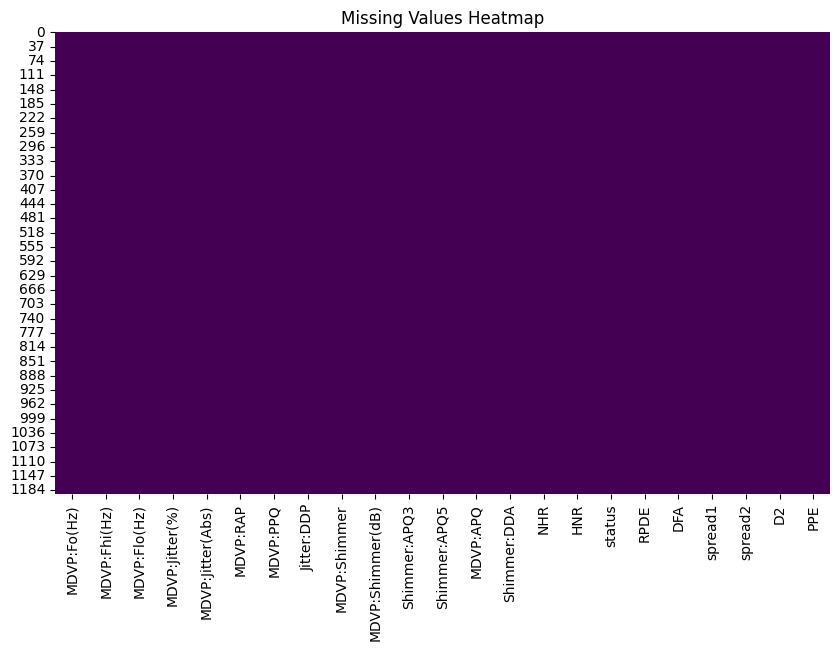

In [23]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(dataset_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

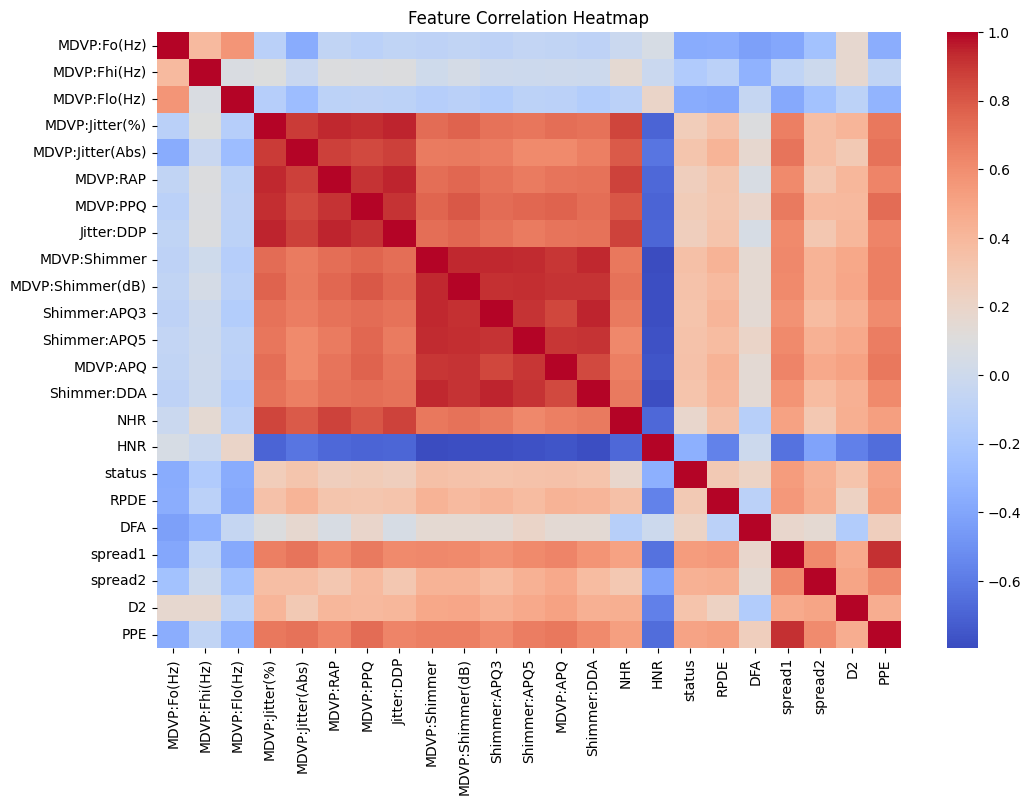

In [24]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dataset_imputed.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

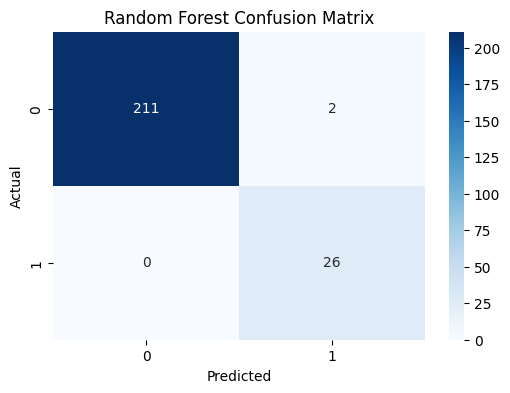

In [25]:
# Define a function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Example usage for a model
conf_matrix = confusion_matrix(y_test, rf_model.predict(X_test))
plot_confusion_matrix(conf_matrix, "Random Forest")

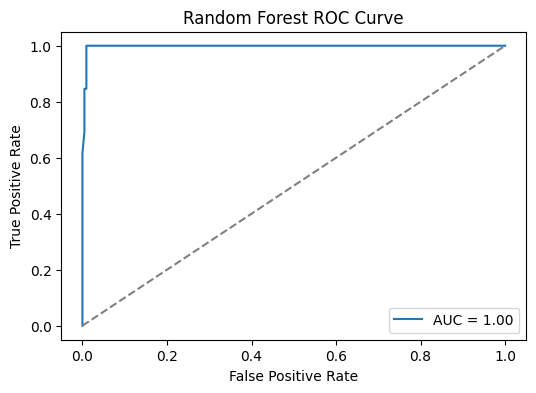

In [26]:
from sklearn.metrics import roc_curve, auc

# Define a function to plot the ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
        plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
        plt.title(f"{model_name} ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.show()

# Example usage for a model
plot_roc_curve(rf_model, X_test, y_test, "Random Forest")

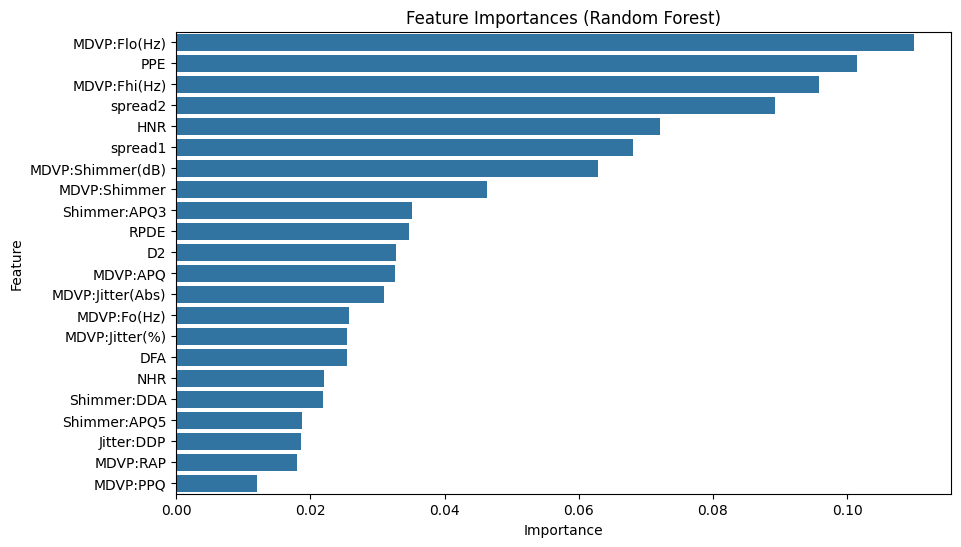

In [27]:
# Feature importance for Random Forest
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("Feature Importances (Random Forest)")
plt.show()

<ipython-input-28-606db59de450>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


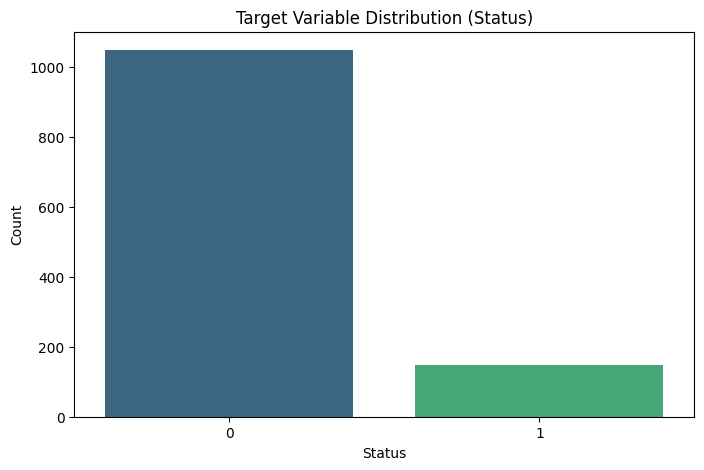

In [28]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette="viridis")
plt.title("Target Variable Distribution (Status)")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

<ipython-input-29-9318b18d07ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset["status"] = y  # Add target variable for hue


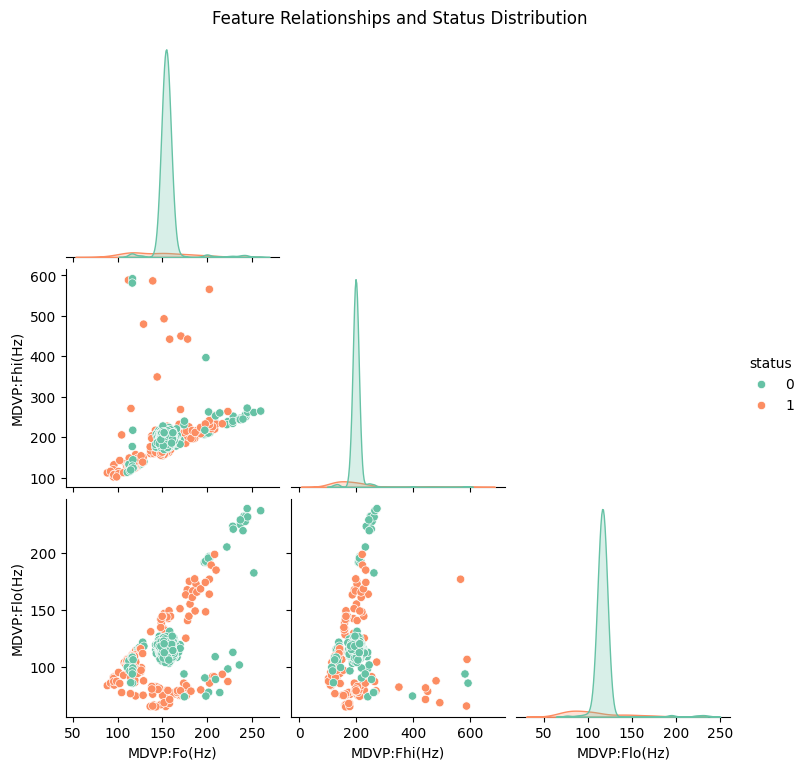

In [29]:
# Pairplot for a subset of features to visualize relationships
selected_features = ["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "status"]
data_subset = dataset_imputed[selected_features]
data_subset["status"] = y  # Add target variable for hue

sns.pairplot(data_subset, hue="status", palette="Set2", diag_kind="kde", corner=True)
plt.suptitle("Feature Relationships and Status Distribution", y=1.02)
plt.show()

<ipython-input-30-3421a1e2472f>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[col], shade=True, color="blue", label="Train", alpha=0.7)
<ipython-input-30-3421a1e2472f>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test[col], shade=True, color="green", label="Test", alpha=0.7)


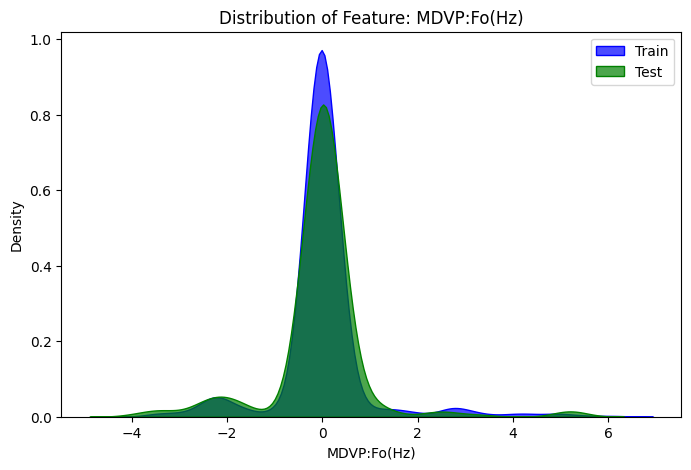

<ipython-input-30-3421a1e2472f>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[col], shade=True, color="blue", label="Train", alpha=0.7)
<ipython-input-30-3421a1e2472f>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test[col], shade=True, color="green", label="Test", alpha=0.7)


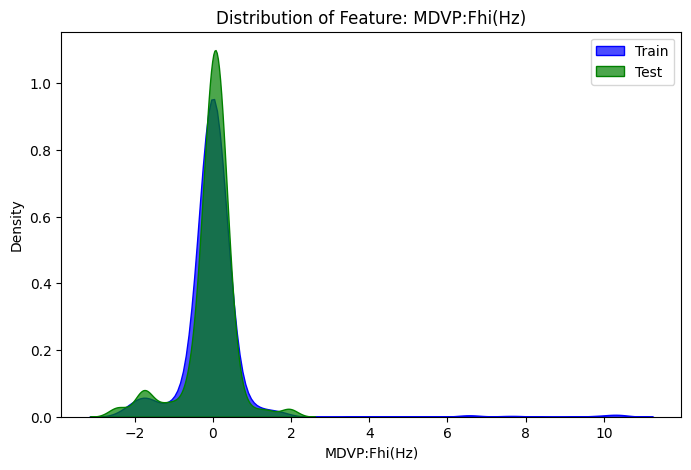

<ipython-input-30-3421a1e2472f>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[col], shade=True, color="blue", label="Train", alpha=0.7)
<ipython-input-30-3421a1e2472f>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test[col], shade=True, color="green", label="Test", alpha=0.7)


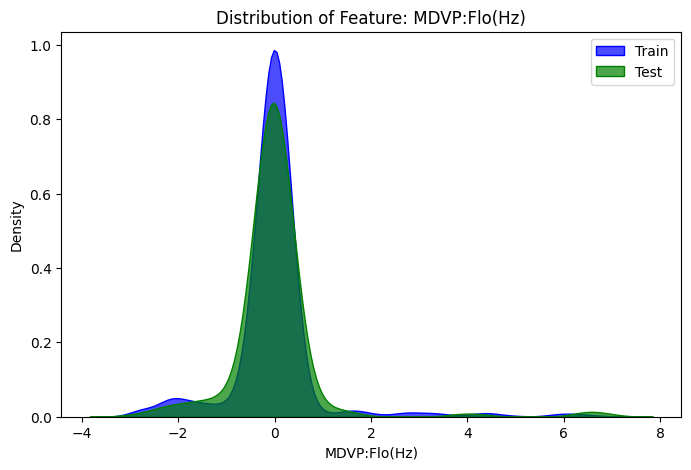

<ipython-input-30-3421a1e2472f>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[col], shade=True, color="blue", label="Train", alpha=0.7)
<ipython-input-30-3421a1e2472f>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test[col], shade=True, color="green", label="Test", alpha=0.7)


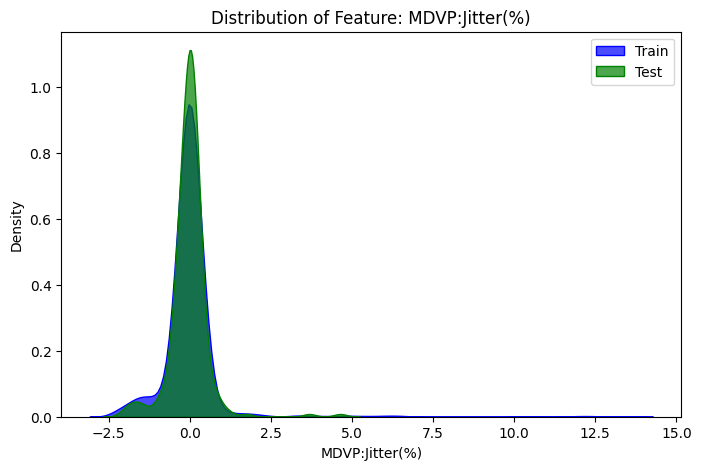

<ipython-input-30-3421a1e2472f>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[col], shade=True, color="blue", label="Train", alpha=0.7)
<ipython-input-30-3421a1e2472f>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test[col], shade=True, color="green", label="Test", alpha=0.7)


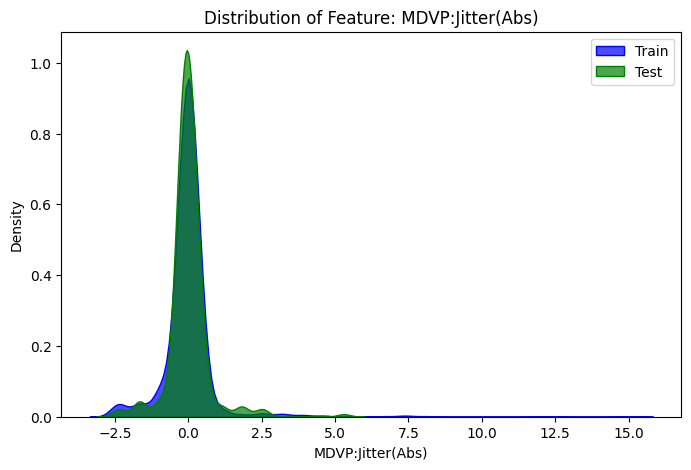

<ipython-input-30-3421a1e2472f>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[col], shade=True, color="blue", label="Train", alpha=0.7)
<ipython-input-30-3421a1e2472f>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test[col], shade=True, color="green", label="Test", alpha=0.7)


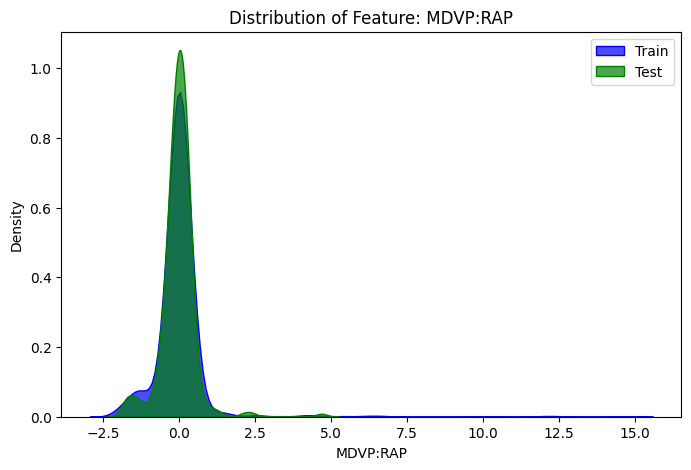

In [30]:
# Visualize distributions of numerical features
for col in X_train.columns[:6]:  # Adjust the range for more features
    plt.figure(figsize=(8, 5))
    sns.kdeplot(X_train[col], shade=True, color="blue", label="Train", alpha=0.7)
    sns.kdeplot(X_test[col], shade=True, color="green", label="Test", alpha=0.7)
    plt.title(f"Distribution of Feature: {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

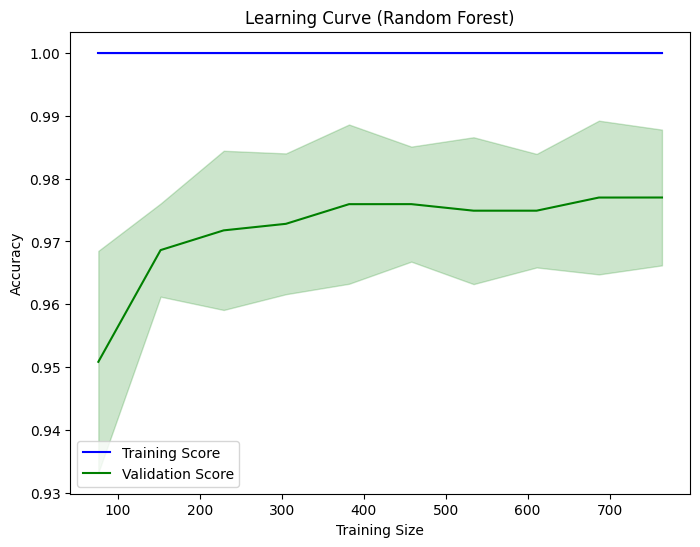

In [31]:
from sklearn.model_selection import learning_curve
import numpy as np

# Function to plot learning curve
def plot_learning_curve(estimator, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring="accuracy", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
    plt.plot(train_sizes, test_mean, label="Validation Score", color="green")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")
    plt.title(f"Learning Curve ({model_name})")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Example usage for Random Forest
plot_learning_curve(rf_model, X_train, y_train, "Random Forest")

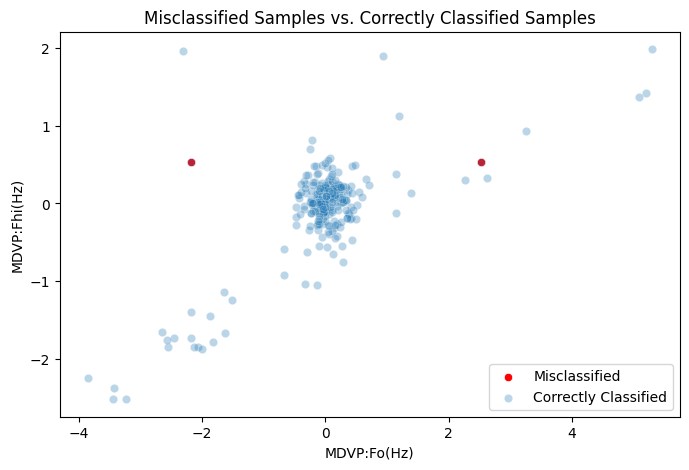

In [32]:
# Analyze misclassified samples
y_pred_rf = rf_model.predict(X_test)
misclassified = X_test[(y_pred_rf != y_test)]

# Visualize misclassified sample distribution across a key feature
plt.figure(figsize=(8, 5))
sns.scatterplot(x=misclassified["MDVP:Fo(Hz)"], y=misclassified["MDVP:Fhi(Hz)"], color="red", label="Misclassified")
sns.scatterplot(x=X_test["MDVP:Fo(Hz)"], y=X_test["MDVP:Fhi(Hz)"], alpha=0.3, label="Correctly Classified")
plt.title("Misclassified Samples vs. Correctly Classified Samples")
plt.xlabel("MDVP:Fo(Hz)")
plt.ylabel("MDVP:Fhi(Hz)")
plt.legend()
plt.show()

<ipython-input-33-91b08f78b283>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


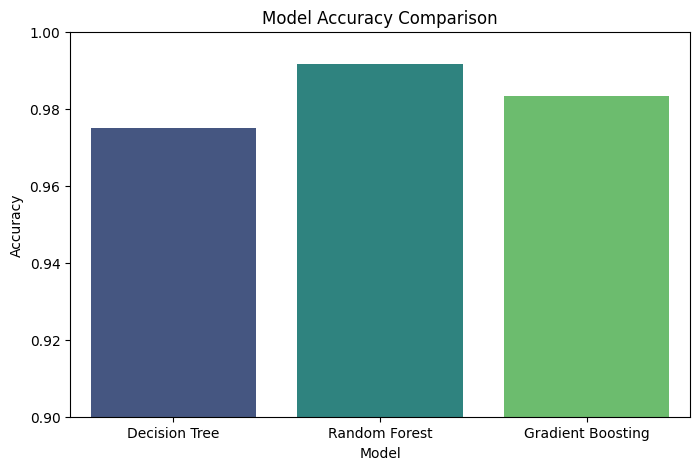

In [33]:
# Bar plot comparing model accuracy
model_names = ["Decision Tree", "Random Forest", "Gradient Boosting"]
accuracies = [
    accuracy_score(y_test, dt_model.predict(X_test)),
    accuracy_score(y_test, rf_model.predict(X_test)),
    accuracy_score(y_test, gb_model.predict(X_test)),
]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)  # Adjust range to focus on high accuracy
plt.show()

In [34]:
# Save the models
joblib.dump(dt_model, "decision_tree_model.h5")
joblib.dump(rf_model, "random_forest_model.h5")
joblib.dump(gb_model, "gradient_boosting_model.h5")

print("Models saved successfully!")

Models saved successfully!
